# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [337]:
pip install pandas matplotlib seaborn numpy scipy scikit-learn datasist yellowbrick kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [338]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import pickle
import itertools

from matplotlib.colors import ListedColormap
from matplotlib.ticker import PercentFormatter
from scipy.spatial import ConvexHull

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from datasist.structdata import detect_outliers

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
from kneed import KneeLocator

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [339]:
df = pd.read_csv("./data_science_job.csv")
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [341]:
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Dataset memiliki 5000 baris dan 12 kolom.


In [342]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [343]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


## 2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.


In [344]:
df.isna().sum()

work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

In [345]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


## 3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.


In [346]:
print("Statistik Deskriptif untuk Kolom Numerikal:")
df.describe()

Statistik Deskriptif untuk Kolom Numerikal:


,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [347]:
print("Statistik Deskriptif untuk Kolom Numerikal:")
df.describe(include=['object'])

Statistik Deskriptif untuk Kolom Numerikal:


,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,5000,4500,4500,5000,4500,5000,5000,5000,4500
unique,15,4,5,7,4,4,3,7,3
top,Data Engineer in office,Data Science,EUR,JP,SE,PT,Hybrid,UK,S
freq,372,1173,962,783,1154,1268,1721,789,1519


### Visualisasi Numerical Columns

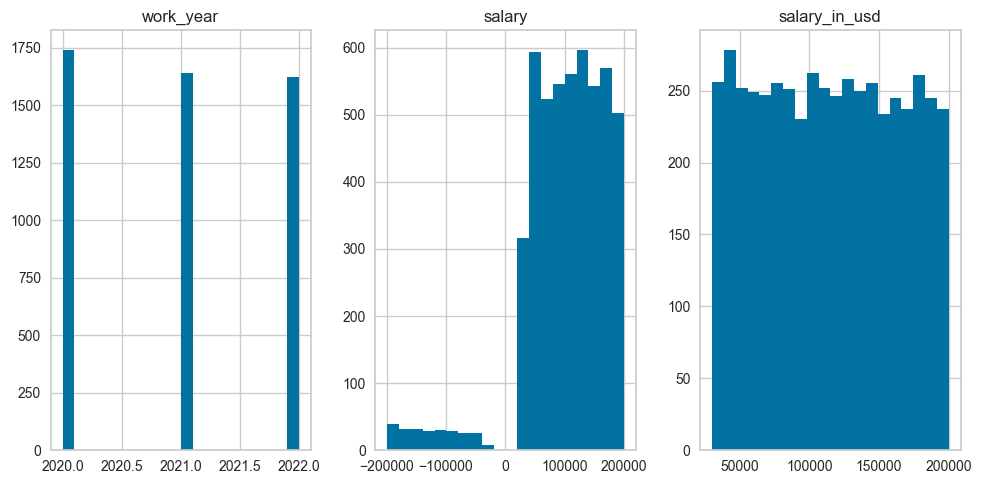

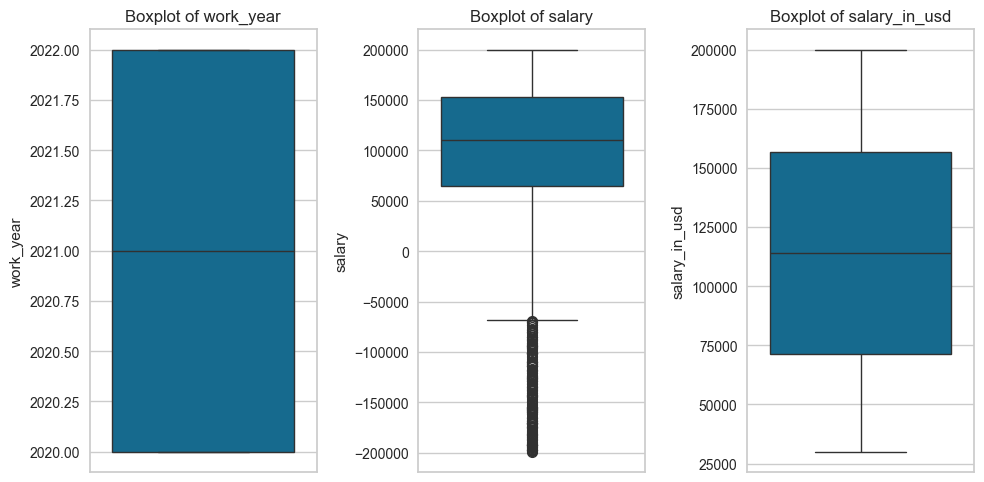

In [348]:
# Memilih hanya kolom numerik (int dan float)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Membuat histogram untuk setiap kolom numerik
numerical_df.hist(bins=20, figsize=(10, 5), layout=(1, len(numerical_df.columns)))
plt.tight_layout()
plt.show()

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_df.columns, 1):
    plt.subplot(1, len(numerical_df.columns), i)
    sns.boxplot(y=numerical_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Scatter Plot 

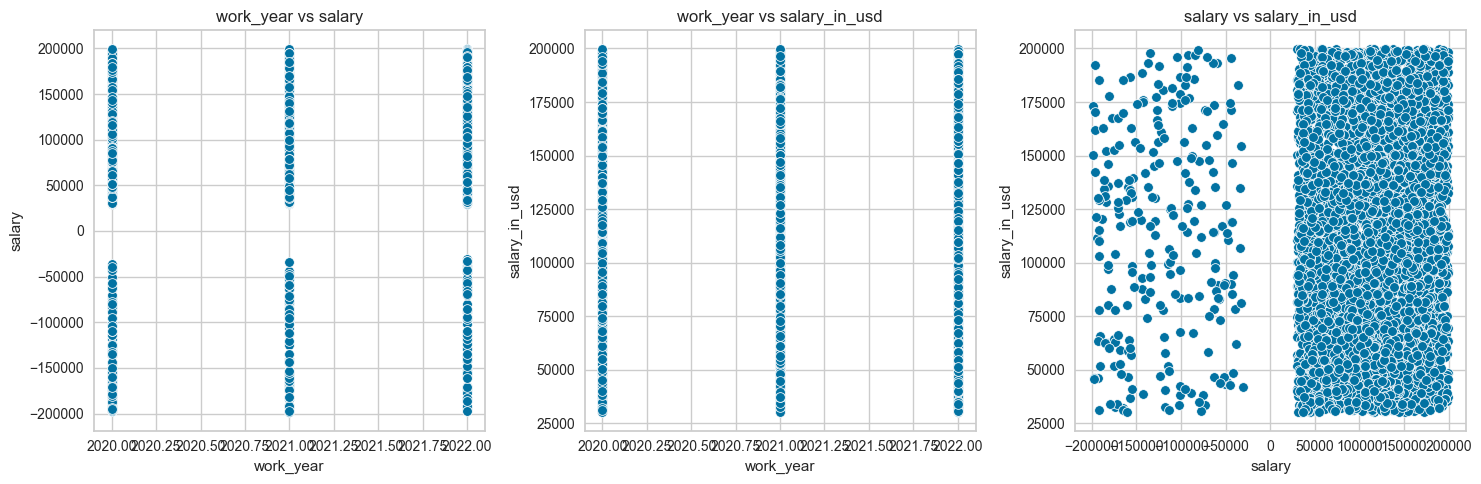

In [349]:
# Membuat scatter plot untuk setiap kombinasi pasangan kolom numerik
combinations = list(itertools.combinations(numerical_df.columns, 2))
plt.figure(figsize=(15, 5))

for i, (col1, col2) in enumerate(combinations, 1):
    plt.subplot(1, len(combinations), i)
    sns.scatterplot(x=numerical_df[col1], y=numerical_df[col2])
    plt.title(f'{col1} vs {col2}')

plt.tight_layout()
plt.show()

## 4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.


### Visualisasi Categorical Columns

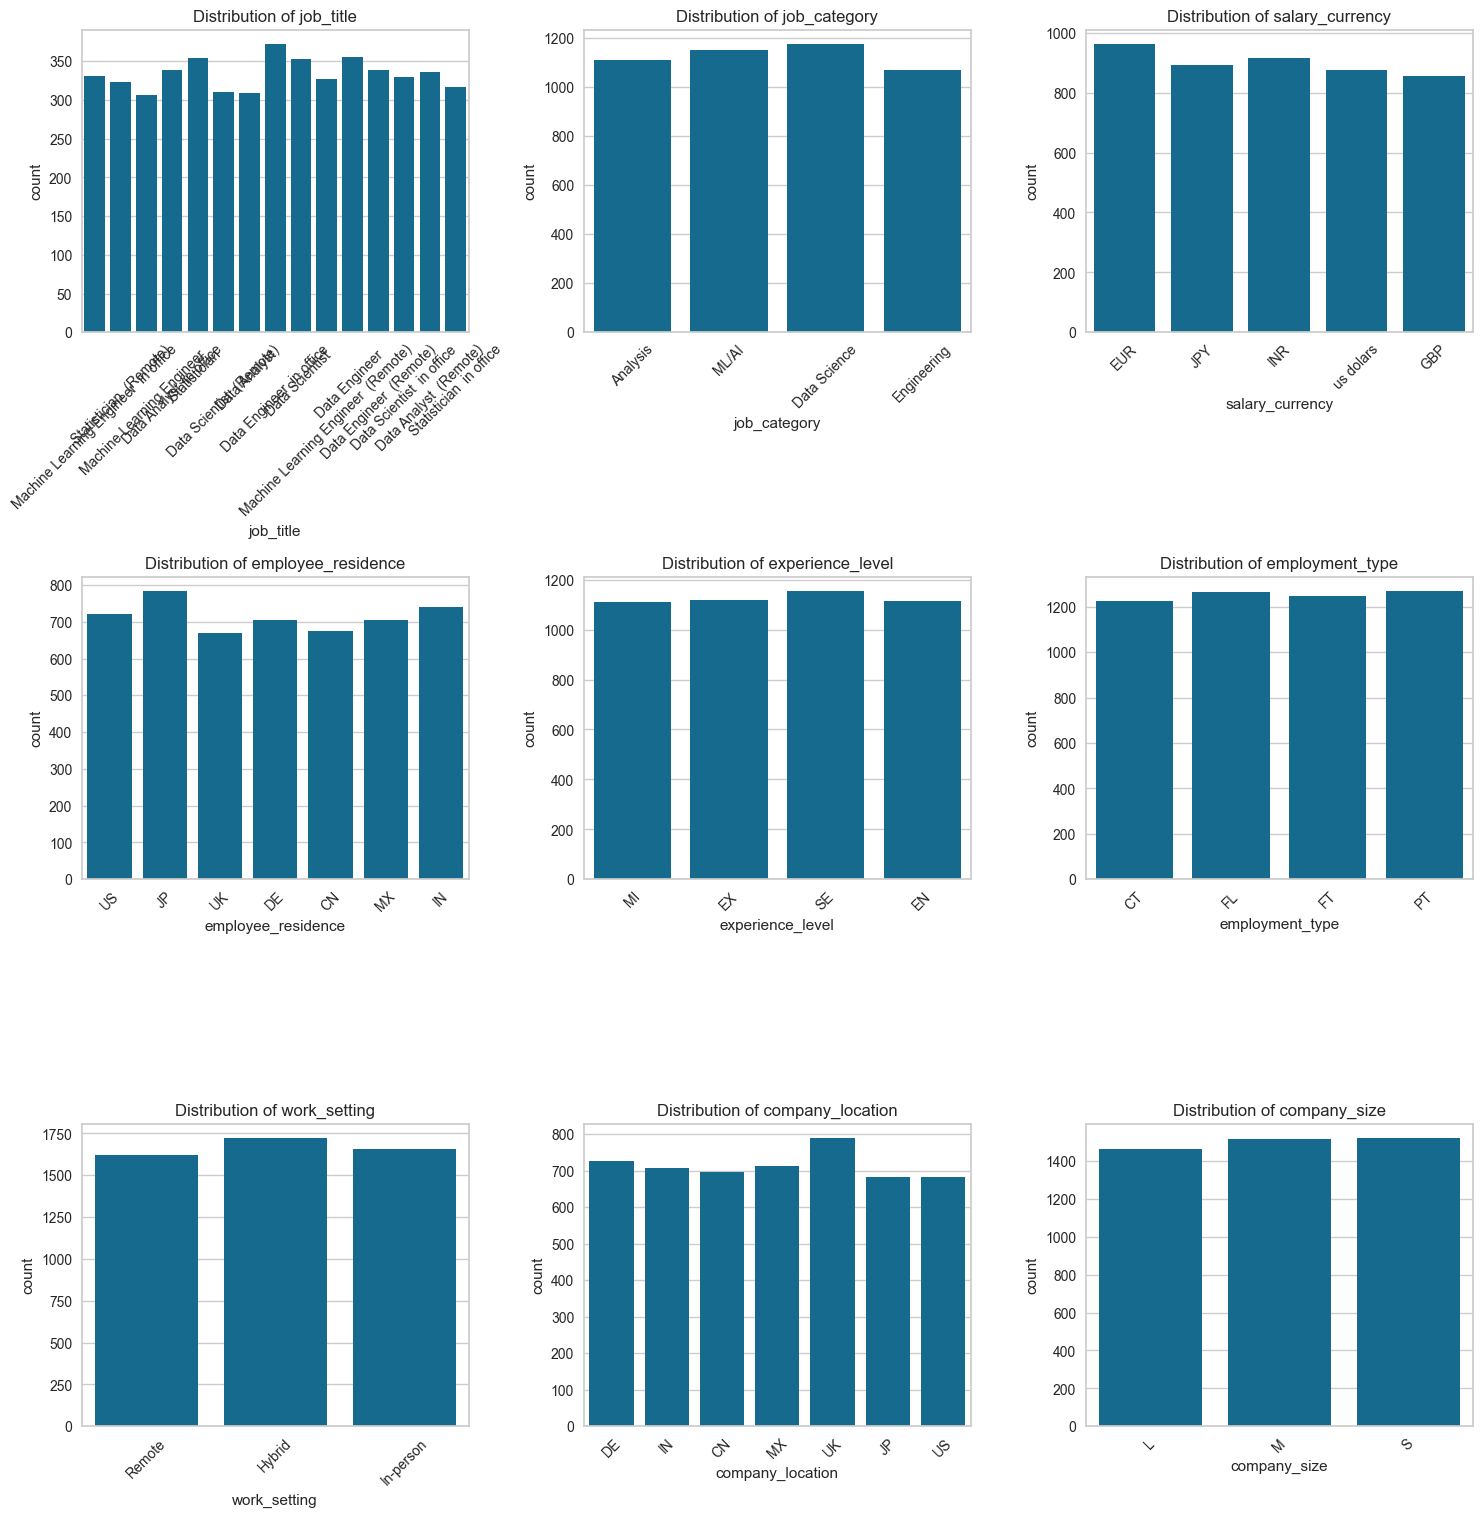

In [350]:
# Memilih hanya kolom bertipe object (categorical)
categorical_df = df.select_dtypes(include=['object'])

# Tentukan jumlah kolom kategorikal
num_cols = len(categorical_df.columns)

# Tentukan ukuran grid yang cukup besar agar semua plot bisa ditampilkan
rows = (num_cols // 3) + 1
cols = 3

# Membuat count plot untuk setiap kolom kategorikal
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(categorical_df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

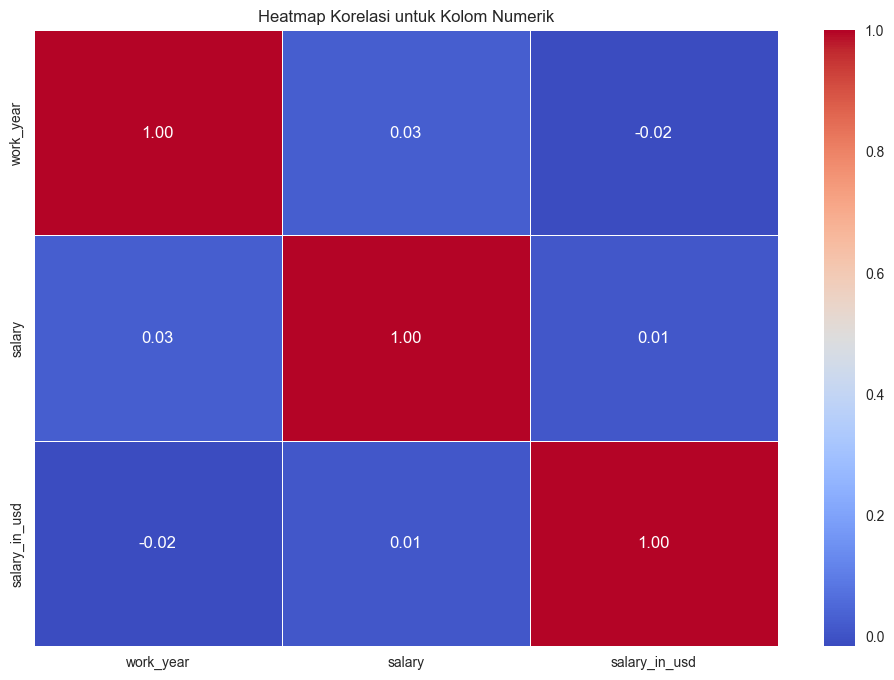

In [351]:
# Memilih hanya kolom numerik (int dan float)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung matriks korelasi hanya untuk kolom numerik
corr_matrix = numerical_df.corr()

# Buat ukuran figure
plt.figure(figsize=(12, 8))

# Heatmap korelasi dengan annotasi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap Korelasi untuk Kolom Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menangani Data Kosong

In [352]:
# Cek apakah ada nilai kosong di setiap kolom
print("Sebelum mengisi nilai kosong:")
print(df.isna().sum())

Sebelum mengisi nilai kosong:
work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64


In [353]:
# Mengisi nilai kosong untuk kolom numerik dengan mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Mengisi nilai kosong untuk kolom kategorikal dengan modus
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [354]:
# Cek kembali apakah masih ada nilai kosong
print("\nSetelah mengisi nilai kosong:")
print(df.isna().sum())


Setelah mengisi nilai kosong:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


## 2. Mengubah menjadi tipe data datetime (jika work_year merepresentasikan tahun)

In [355]:
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y').dt.year
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


## 3. Melakukan Normalisasi Fitur

In [356]:
# Membuat scaler dan menyimpannya agar bisa digunakan untuk inverse transform
scaler = MinMaxScaler()

# Memilih kolom numerikal yang valid
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if numerical_cols.empty:
    print("Tidak ada kolom numerikal untuk dinormalisasi.")
else:
    # Mengecek dan menormalisasi jika tidak ada NaN
    if df[numerical_cols].isnull().any().any():
        print("Masih ada nilai NaN di kolom numerikal berikut:")
        print(df[numerical_cols].isnull().sum()[df[numerical_cols].isnull().sum() > 0])
    else:
        # Simpan urutan kolom numerikal agar tetap konsisten
        saved_numerical_cols = numerical_cols
        
        # Melakukan normalisasi
        df[saved_numerical_cols] = scaler.fit_transform(df[saved_numerical_cols])
        
        print("Normalisasi berhasil dilakukan pada kolom numerikal berikut:")
        print(saved_numerical_cols)

Normalisasi berhasil dilakukan pada kolom numerikal berikut:
Index(['salary', 'salary_in_usd'], dtype='object')


## 4. Deteksi dan Penanganan Outlier

In [357]:
# Fungsi helper untuk mendeteksi outlier menggunakan IQR
def calculate_outliers(data):
    """
    Menghitung nilai outlier dalam data menggunakan metode IQR.
    Mengembalikan list nilai yang dianggap outlier.
    """
    q25, q75 = np.percentile(data.dropna(), [25, 75])
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    return data[(data < minimum) | (data > maximum)].tolist()

# Fungsi untuk mengecek outlier di setiap kolom numerik
def check_outliers(df):
    print("\n=== Outliers per Kolom ===")
    for col in df.select_dtypes(include=[np.number]).columns:
        outliers = calculate_outliers(df[col])
        print(f"Kolom '{col}' memiliki {len(outliers)} outlier")

# Fungsi untuk mengisi missing value dengan median atau mode
def clean_missing_values(df):
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"Kolom '{col}' memiliki {missing_count} missing value. Diisi dengan median: {median_val}.")
            else:
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
                print(f"Kolom '{col}' non-numerik memiliki {missing_count} missing value. Diisi dengan mode: {mode_val}.")
    return df

# Fungsi untuk mengisi missing value dengan nilai sebelumnya (forward & backward fill)
def fill_missing_with_previous(df, columns=None):
    if columns is None:
        columns = df.columns[df.isnull().any()].tolist()
    
    for col in columns:
        missing_before = df[col].isnull().sum()
        df[col].fillna(method="ffill", inplace=True)
        df[col].fillna(method="bfill", inplace=True)
        missing_after = df[col].isnull().sum()
        print(f"Kolom '{col}': missing count sebelum = {missing_before}, setelah = {missing_after}")
    
    return df

# Fungsi untuk menerapkan winsorizing pada outlier
def auto_winsorize(df, lower_quantile=0.05, upper_quantile=0.95):
    for col in df.select_dtypes(include=[np.number]).columns:
        outliers = calculate_outliers(df[col])
        if outliers:
            lower, upper = df[col].quantile([lower_quantile, upper_quantile])
            df[col] = df[col].clip(lower, upper)
            print(f"Kolom '{col}' memiliki {len(outliers)} outlier, winsorized dengan batas bawah {lower} dan atas {upper}.")
        else:
            print(f"Kolom '{col}' tidak memiliki outlier.")
    return df

# Fungsi untuk menerapkan transformasi log pada outlier negatif
def auto_transform_negative_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        outliers = calculate_outliers(df[col])
        num_outliers = len(outliers)
        if num_outliers > 0:
            if (df[col] <= 0).any():
                shift = abs(df[col].min()) + 1
                df[col] = np.log1p(df[col] + shift)
                print(f"Kolom '{col}' memiliki {num_outliers} outlier dan nilai negatif/nol, diterapkan shift sebesar {shift} dan transformasi log.")
            else:
                df[col] = np.log1p(df[col])
                print(f"Kolom '{col}' memiliki {num_outliers} outlier, transformasi log1p diterapkan.")
        else:
            print(f"Kolom '{col}' tidak memiliki outlier.")
    return df

# Fungsi untuk menampilkan baris yang mengandung nilai negatif
def show_negative_rows(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    negative_rows = df[(df[columns] < 0).any(axis=1)]
    print("Baris-baris dengan nilai negatif:")
    print(negative_rows)
    return negative_rows


In [358]:
df = auto_winsorize(df)
print("\n")

Kolom 'work_year' tidak memiliki outlier.
Kolom 'salary' memiliki 201 outlier, winsorized dengan batas bawah 0.5662473224005363 dan atas 0.974760583729225.
Kolom 'salary_in_usd' tidak memiliki outlier.




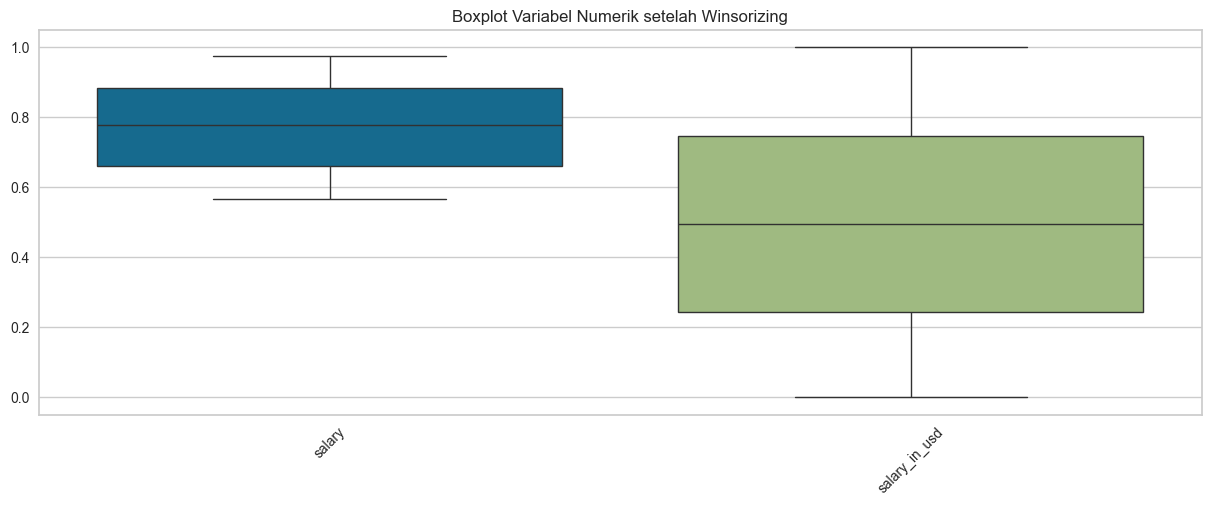

In [359]:
# Boxplot setelah Winsorizing
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot Variabel Numerik setelah Winsorizing')
plt.xticks(rotation=45)
plt.show()

In [360]:
#Melakukan log -1p jika datasetnya memiliki outlier
df = auto_transform_negative_outliers(df)
print("\n")

Kolom 'work_year' tidak memiliki outlier.
Kolom 'salary' tidak memiliki outlier.
Kolom 'salary_in_usd' tidak memiliki outlier.




In [361]:
#Chechking Outliers
check_outliers(df)
print("\n")


=== Outliers per Kolom ===
Kolom 'work_year' memiliki 0 outlier
Kolom 'salary' memiliki 0 outlier
Kolom 'salary_in_usd' memiliki 0 outlier




## 5. Encoding

In [362]:
# Encoding dengan One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,work_year,salary,salary_in_usd,job_title_Data Analyst (Remote),job_title_Data Analyst in office,job_title_Data Engineer,job_title_Data Engineer (Remote),job_title_Data Engineer in office,job_title_Data Scientist,job_title_Data Scientist (Remote),...,work_setting_In-person,work_setting_Remote,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_M,company_size_S
0,2022,0.966572,0.624055,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,2020,0.776025,0.223370,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
2,2022,0.652241,0.725385,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2022,0.885135,0.619089,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2020,0.930741,0.030241,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [363]:
print(df.head())

   work_year    salary  salary_in_usd  job_title_Data Analyst  (Remote)  \
0       2022  0.966572       0.624055                             False   
1       2020  0.776025       0.223370                             False   
2       2022  0.652241       0.725385                             False   
3       2022  0.885135       0.619089                             False   
4       2020  0.930741       0.030241                             False   

   job_title_Data Analyst  in office  job_title_Data Engineer    \
0                              False                      False   
1                              False                      False   
2                              False                      False   
3                               True                      False   
4                              False                      False   

   job_title_Data Engineer  (Remote)  job_title_Data Engineer  in office  \
0                              False                               Fal

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   work_year                                       5000 non-null   int32  
 1   salary                                          5000 non-null   float64
 2   salary_in_usd                                   5000 non-null   float64
 3   job_title_Data Analyst  (Remote)                5000 non-null   bool   
 4   job_title_Data Analyst  in office               5000 non-null   bool   
 5   job_title_Data Engineer                         5000 non-null   bool   
 6   job_title_Data Engineer  (Remote)               5000 non-null   bool   
 7   job_title_Data Engineer  in office              5000 non-null   bool   
 8   job_title_Data Scientist                        5000 non-null   bool   
 9   job_title_Data Scientist  (Remote)       

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

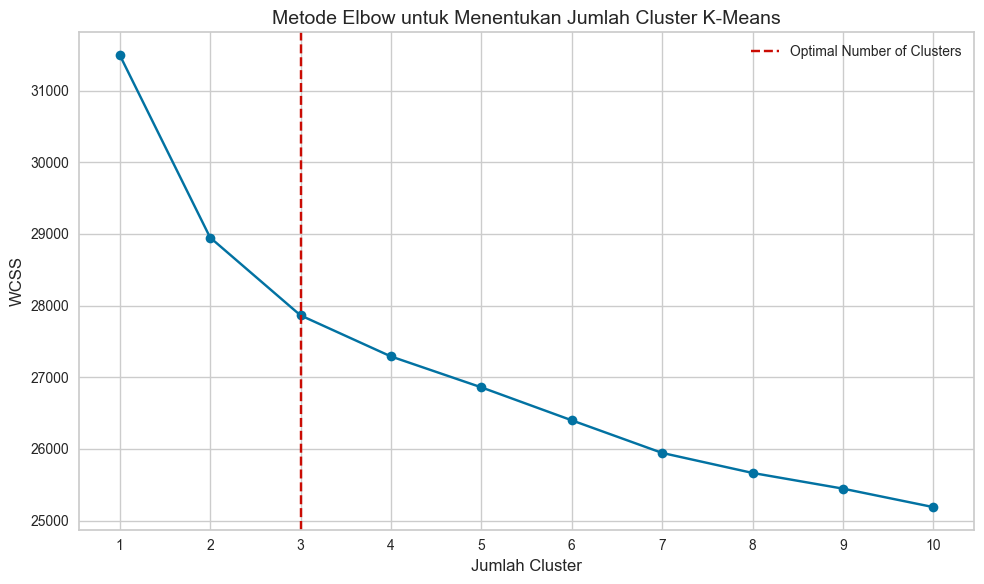

In [365]:
# Visualisasi Elbow untuk menentukan jumlah cluster optimal
n_clusters = range(1, 11)
wcss = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, wcss, marker='o', color='b', linestyle='-')
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster K-Means', fontsize=14)
plt.grid(True)
plt.xticks(n_clusters)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [366]:
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

df['KMeans_Cluster'] = kmeans_labels
df['KMeans_Cluster'].value_counts()

KMeans_Cluster
1    1926
0    1622
2    1452
Name: count, dtype: int64

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [367]:
# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(df, kmeans_labels)

# Menyusun hasil clustering
clustering_scores = pd.DataFrame({
    'Clustering Method': ['K-Means'],
    'Silhouette Score': [kmeans_silhouette]
})

clustering_scores

,Clustering Method,Silhouette Score
0,K-Means,0.102215


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [368]:
# 1. Memuat Data & Memilih Fitur
features = ['work_year', 'salary', 'salary_in_usd', 'job_category_Data Science', 'salary_currency_us dolars']
X = df[features]

In [369]:
# 2. Penerapan PCA (Tanpa menentukan jumlah komponen)

pca = PCA()
pca.fit(X)

# Variansi yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_
PC_values = np.arange(1, len(explained_variance_ratio) + 1)

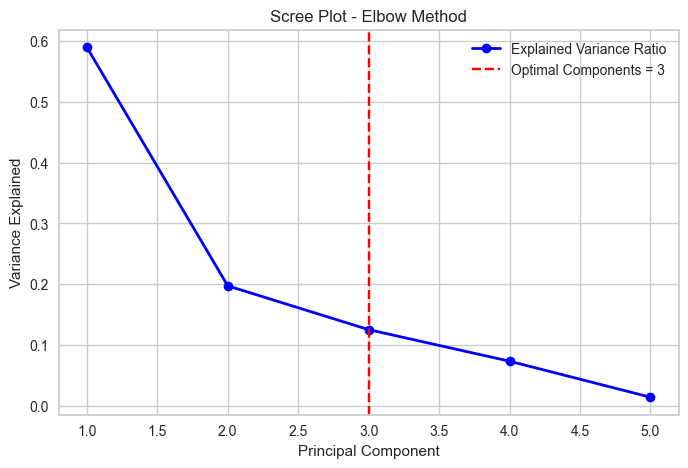

In [370]:
# 3. Plot Scree Plot (Menentukan Komponen Optimal)

plt.figure(figsize=(8, 5))
plt.plot(PC_values, explained_variance_ratio, 'o-', linewidth=2, color='blue', label="Explained Variance Ratio")

# Menentukan komponen optimal menggunakan variansi kumulatif (misalnya, 90%)
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_n_components = np.argmax(cumulative_variance >= 0.90) + 1  # +1 karena index dimulai dari 0

plt.axvline(x=optimal_n_components, color='red', linestyle='--', label=f'Optimal Components = {optimal_n_components}')
plt.title('Scree Plot - Elbow Method')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)
plt.show()


In [371]:
# 4. Penerapan PCA dengan Komponen Optimal

pca = PCA(n_components=optimal_n_components)
X_pca = pca.fit_transform(X)

Silhouette Score untuk KMeans dengan 2 cluster: 0.4756982104103696
Silhouette Score untuk KMeans dengan 3 cluster: 0.4951311853025172
Silhouette Score untuk KMeans dengan 4 cluster: 0.5776567511870844
Silhouette Score untuk KMeans dengan 5 cluster: 0.6678701917001346
Silhouette Score untuk KMeans dengan 6 cluster: 0.7512674541277872

Jumlah cluster terbaik (best_k) berdasarkan Silhouette Score tertinggi: 6


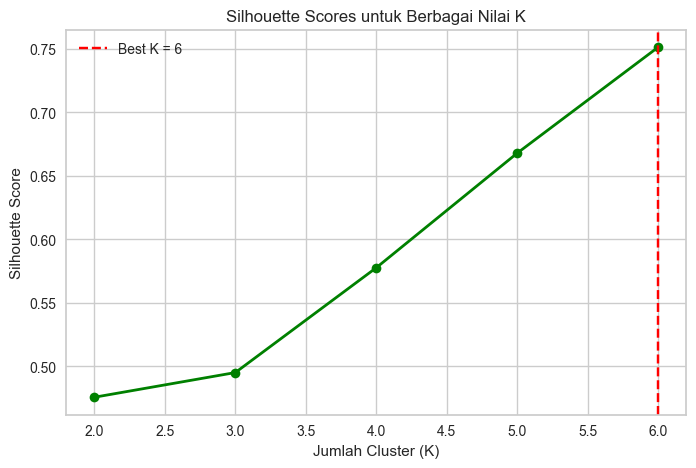

In [372]:
# 5. Menentukan Jumlah Cluster Optimal Menggunakan Silhouette Score

k_values = range(2, 7)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, kmeans_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score untuk KMeans dengan {k} cluster: {score}')

# Menentukan jumlah cluster terbaik secara otomatis berdasarkan Silhouette Score tertinggi
best_k = k_values[np.argmax(silhouette_scores)]
print(f'\nJumlah cluster terbaik (best_k) berdasarkan Silhouette Score tertinggi: {best_k}')

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'o-', linewidth=2, color='green')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.title('Silhouette Scores untuk Berbagai Nilai K')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()


In [373]:
# 7. Penerapan KMeans Clustering dengan K Terbaik

final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
final_kmeans_labels = final_kmeans.fit_predict(X_pca)

# Menambahkan label cluster ke DataFrame asli
df['KMeans_Cluster'] = final_kmeans_labels

# Menghitung jumlah data yang termasuk dalam setiap cluster
cluster_counts = df['KMeans_Cluster'].value_counts()

# Menampilkan hasilnya
print("Jumlah data di setiap cluster:")
print(cluster_counts)

final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
print(f'\nSilhouette Score untuk KMeans dengan {best_k} cluster: {final_silhouette_score}')

Jumlah data di setiap cluster:
KMeans_Cluster
1    1153
4    1106
2    1068
5     585
0     572
3     516
Name: count, dtype: int64

Silhouette Score untuk KMeans dengan 6 cluster: 0.7512674541277872


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

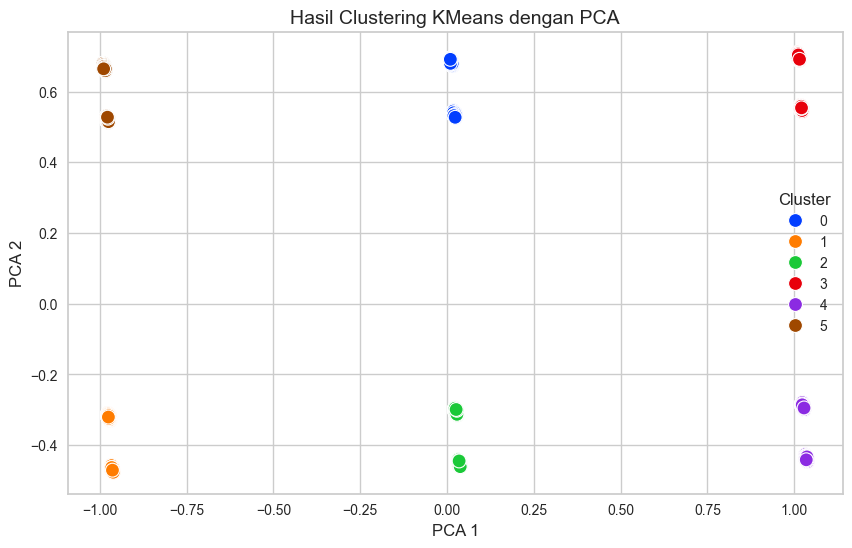

In [374]:
# Visualisasi hasil clustering KMeans dengan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],  # PC1
    y=X_pca[:, 1],  # PC2
    hue=final_kmeans_labels,  # Menentukan warna berdasarkan cluster
    palette='bright',  # Warna untuk setiap cluster
    s=100  # Ukuran titik
)
plt.title('Hasil Clustering KMeans dengan PCA', fontsize=14)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


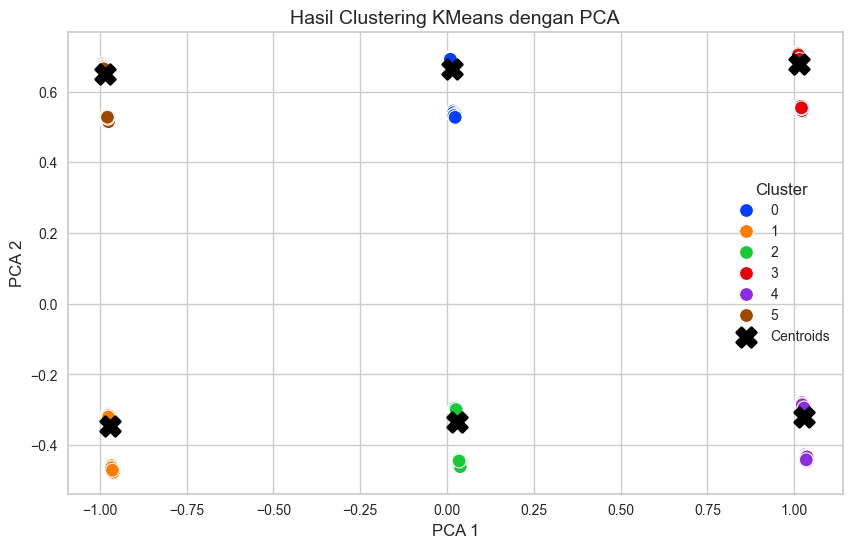

In [375]:
# Visualisasi hasil clustering KMeans dengan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],  # PC1
    y=X_pca[:, 1],  # PC2
    hue=final_kmeans_labels,  # Menentukan warna berdasarkan cluster
    palette='bright',  # Warna untuk setiap cluster
    s=100  # Ukuran titik
)

# Menambahkan centroid ke visualisasi
centroids = final_kmeans.cluster_centers_

# Jika PCA dilakukan lebih dari 2 dimensi, kita perlu mereduksi centroid ke 2 dimensi
# (asumsi kita menggunakan X_pca yang sudah di-reduce menjadi 2 komponen)
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    s=200, c='black', marker='X', label='Centroids', linewidths=2
)

plt.title('Hasil Clustering KMeans dengan PCA', fontsize=14)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [376]:
# Menambahkan label cluster ke DataFrame asli
df['KMeans_Cluster'] = final_kmeans_labels

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   work_year                                       5000 non-null   int32  
 1   salary                                          5000 non-null   float64
 2   salary_in_usd                                   5000 non-null   float64
 3   job_title_Data Analyst  (Remote)                5000 non-null   bool   
 4   job_title_Data Analyst  in office               5000 non-null   bool   
 5   job_title_Data Engineer                         5000 non-null   bool   
 6   job_title_Data Engineer  (Remote)               5000 non-null   bool   
 7   job_title_Data Engineer  in office              5000 non-null   bool   
 8   job_title_Data Scientist                        5000 non-null   bool   
 9   job_title_Data Scientist  (Remote)       

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [378]:
# Salin data agar tidak merusak df asli
df_inverse = df.copy()

# Mengembalikan data yang sudah dinormalisasi ke nilai aslinya
df_inverse[saved_numerical_cols] = scaler.inverse_transform(df_inverse[saved_numerical_cols])


In [379]:
df_inverse.head()

,work_year,salary,salary_in_usd,job_title_Data Analyst (Remote),job_title_Data Analyst in office,job_title_Data Engineer,job_title_Data Engineer (Remote),job_title_Data Engineer in office,job_title_Data Scientist,job_title_Data Scientist (Remote),...,work_setting_Remote,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_M,company_size_S,KMeans_Cluster
0,2022,186597.0,136086.0,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,4
1,2020,110630.0,67982.0,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,1
2,2022,61280.0,153309.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
3,2022,154130.0,135242.0,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,4
4,2020,172312.0,35156.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,5


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [380]:
# Analisis karakteristik setiap cluster dengan statistik min, max, dan mean
cluster_stats = df_inverse.groupby('KMeans_Cluster').agg({
    'work_year': ['min', 'max', 'mean'],
    'salary': ['min', 'max', 'mean'],
    'salary_in_usd': ['min', 'max', 'mean'],
}).reset_index()

# Ganti nama kolom agar lebih rapi dan mudah dibaca
cluster_stats.columns = [
    'Cluster',
    'Work Year Min', 'Work Year Max', 'Work Year Mean',
    'Salary Min', 'Salary Max', 'Salary Mean',
    'Salary USD Min', 'Salary USD Max', 'Salary USD Mean',
]

# Tampilkan hasil
print("Statistik Deskriptif per Cluster (min, max, mean):")
print(cluster_stats)

Statistik Deskriptif per Cluster (min, max, mean):
   Cluster  Work Year Min  Work Year Max  Work Year Mean  Salary Min  \
0        0           2021           2021          2021.0    26996.35   
1        1           2020           2020          2020.0    30018.00   
2        2           2021           2021          2021.0    30059.00   
3        3           2022           2022          2022.0    26996.35   
4        4           2022           2022          2022.0    30093.00   
5        5           2020           2020          2020.0    26996.35   

   Salary Max    Salary Mean  Salary USD Min  Salary USD Max  Salary USD Mean  
0    189861.6  100986.952360         30209.0        199790.0    114774.403846  
1    189861.6  113098.630009         30318.0        199894.0    113497.857762  
2    189861.6  113783.185393         30178.0        199734.0    116028.032772  
3    189861.6  100070.204942         30016.0        199024.0    113117.310078  
4    189861.6  114973.914105         30290.0

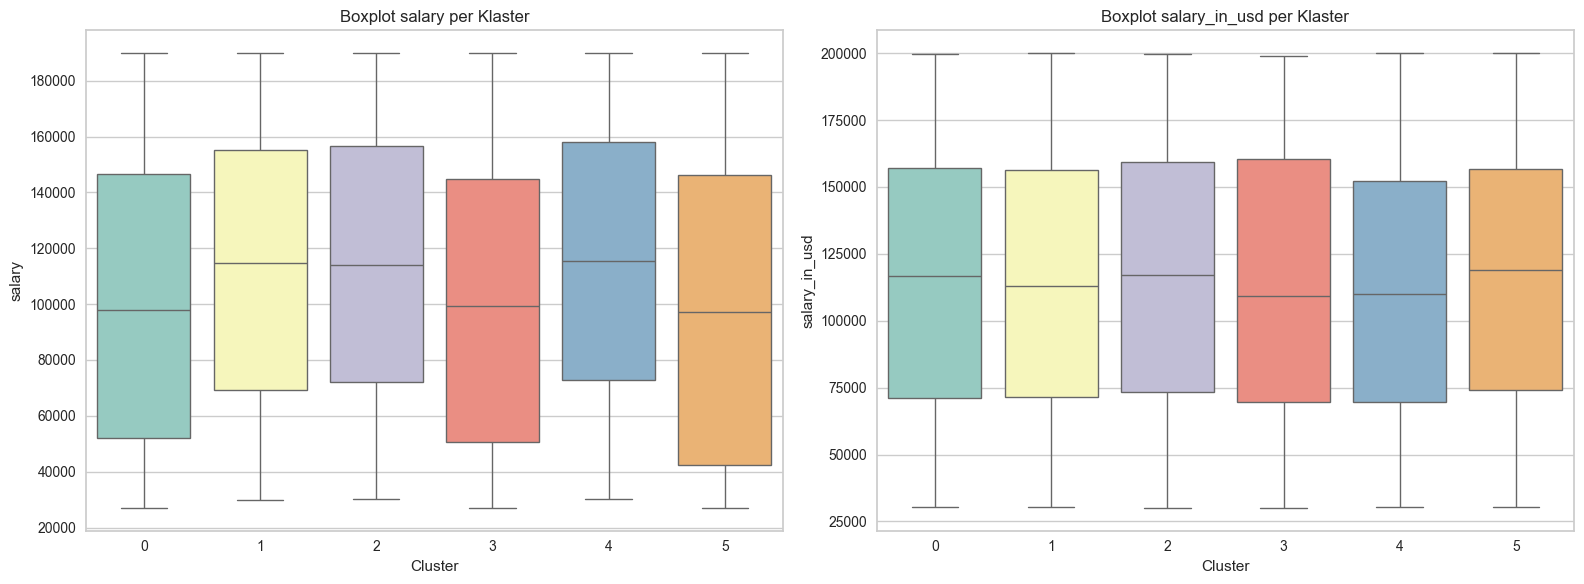

In [381]:
# --- Boxplot Gaji dan Gaji dalam USD per Klaster ---
plt.figure(figsize=(16, 6))
for i, col in enumerate(['salary', 'salary_in_usd']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='KMeans_Cluster', y=col, data=df_inverse, hue='KMeans_Cluster', palette='Set3', dodge=False)
    plt.title(f'Boxplot {col} per Klaster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.legend([],[], frameon=False)  # Menghilangkan legend

plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_3008\3210067120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Salary Mean', data=cluster_stats, palette='viridis')


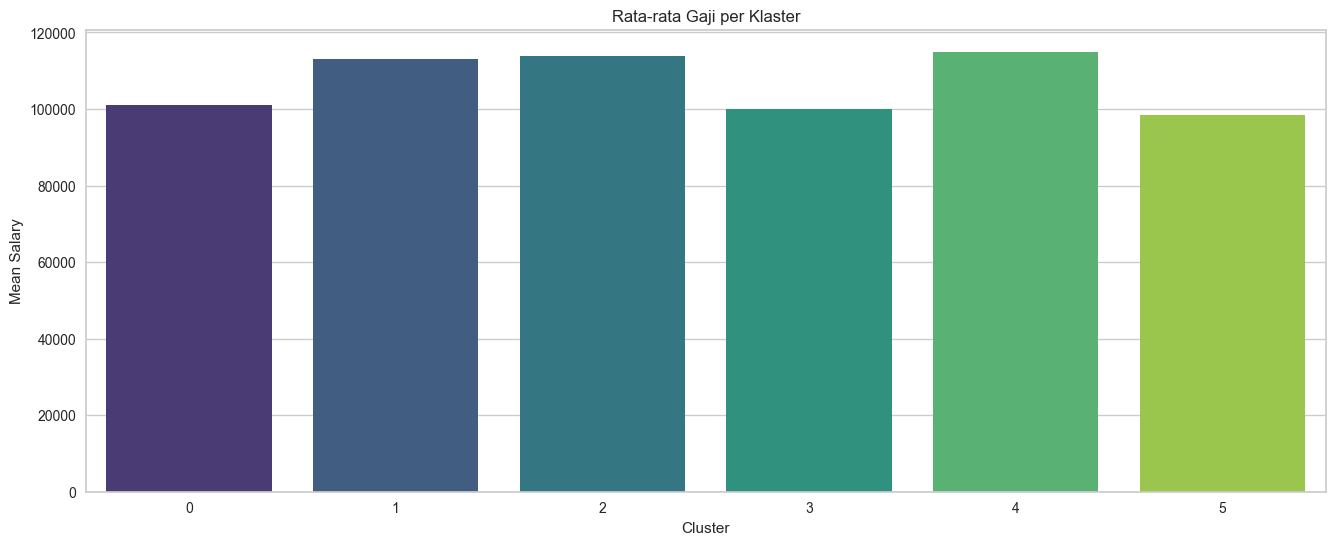

In [382]:
# --- Barplot: Rata-rata Gaji per Klaster ---
plt.figure(figsize=(16, 6))
sns.barplot(x='Cluster', y='Salary Mean', data=cluster_stats, palette='viridis')
plt.title('Rata-rata Gaji per Klaster')
plt.ylabel('Mean Salary')
plt.show()

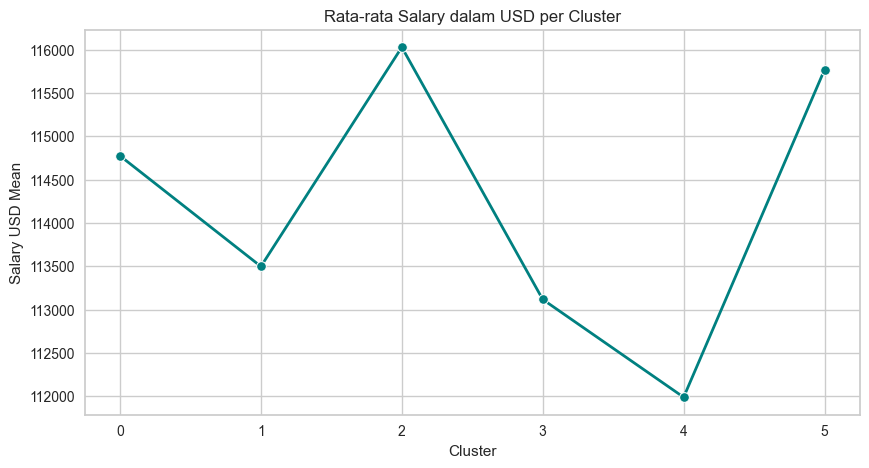

In [383]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Cluster', y='Salary USD Mean', data=cluster_stats, marker='o', linewidth=2, color='teal')
plt.title('Rata-rata Salary dalam USD per Cluster')
plt.ylabel('Salary USD Mean')
plt.xlabel('Cluster')
plt.grid(True)
plt.show()


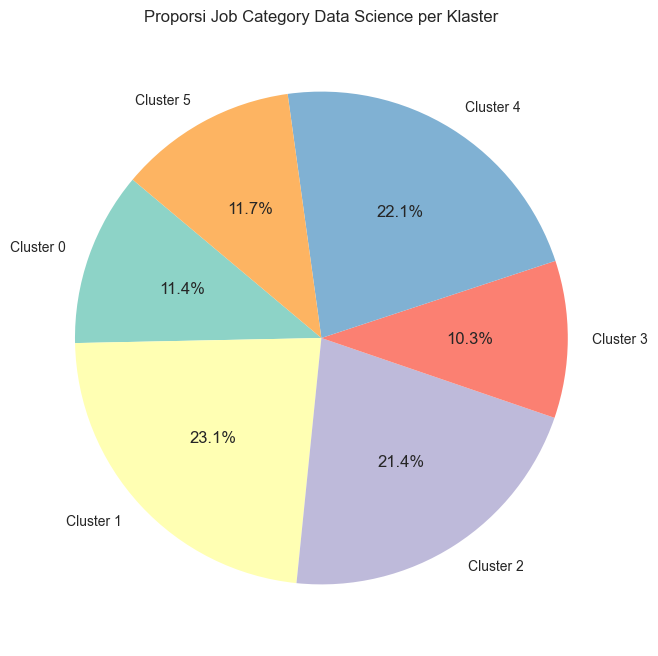

In [384]:
# Menghitung jumlah data pada setiap klaster
cluster_counts = df_inverse['KMeans_Cluster'].value_counts().sort_index()

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Proporsi Job Category Data Science per Klaster')
plt.show()

# **Analisis Karakteristik Cluster**

---

## **Cluster 0**
- **Work Year**: Hanya mencakup tahun 2021
- **Gaji (Salary)**:
  - Minimum: 26.996 USD
  - Maksimum: 189.861 USD
  - Rata-rata: 100.986 USD
- **Salary in USD**:
  - Minimum: 30.209 USD
  - Maksimum: 199.790 USD
  - Rata-rata: 114.774 USD

**Analisis**:
Cluster ini berisi pekerja dari tahun 2021 dengan rata-rata gaji yang cukup tinggi. Walau nilai minimumnya relatif rendah, namun nilai rata-rata dan maksimum menunjukkan bahwa kelompok ini berisi profesional dengan potensi penghasilan menengah ke atas.

**Strategi**:
- Tawarkan peluang karier lanjutan atau promosi internal.
- Rancang pelatihan khusus untuk mempertahankan dan meningkatkan kualitas kerja di kalangan pekerja yang sudah cukup mapan secara finansial.

---

## **Cluster 1**
- **Work Year**: Hanya tahun 2020
- **Gaji (Salary)**:
  - Minimum: 30.018 USD
  - Maksimum: 189.861 USD
  - Rata-rata: 113.098 USD
- **Salary in USD**:
  - Minimum: 30.318 USD
  - Maksimum: 199.894 USD
  - Rata-rata: 113.497 USD

**Analisis**:
Kelompok ini terdiri dari pekerja tahun 2020 dengan rentang gaji yang luas, tetapi rata-rata tetap tinggi. Ini menunjukkan bahwa mereka mungkin sudah lebih lama bekerja dan telah mencapai titik stabil dalam karier mereka.

**Strategi**:
- Tawarkan program loyalitas atau benefit berbasis pengalaman kerja.
- Cocok untuk promosi produk investasi atau pensiun.

---

## **Cluster 2**
- **Work Year**: Tahun 2021
- **Gaji (Salary)**:
  - Minimum: 30.059 USD
  - Maksimum: 189.861 USD
  - Rata-rata: 113.783 USD
- **Salary in USD**:
  - Minimum: 30.178 USD
  - Maksimum: 199.734 USD
  - Rata-rata: 116.028 USD

**Analisis**:
Mirip dengan Cluster 1, namun ini adalah kelompok dari tahun 2021. Rata-rata salary USD-nya paling tinggi di antara semua cluster, menandakan potensi ekspor tenaga kerja dengan bayaran tinggi atau perusahaan multinasional.

**Strategi**:
- Fokus pada program internasionalisasi atau relokasi.
- Tawarkan opsi kerja jarak jauh untuk memperluas cakupan pekerjaan global.

---

## **Cluster 3**
- **Work Year**: Tahun 2022
- **Gaji (Salary)**:
  - Minimum: 26.996 USD
  - Maksimum: 189.861 USD
  - Rata-rata: 100.070 USD
- **Salary in USD**:
  - Minimum: 30.016 USD
  - Maksimum: 199.024 USD
  - Rata-rata: 113.117 USD

**Analisis**:
Kelompok terbaru dalam hal tahun kerja (2022), dengan gaji yang cukup baik. Bisa jadi ini adalah pekerja baru yang berhasil mendapatkan pekerjaan dengan bayaran tinggi sejak awal.

**Strategi**:
- Fokus pada retensi dan pelatihan karyawan baru.
- Berikan bimbingan karier untuk mempercepat kemajuan profesional.

---

## **Cluster 4**
- **Work Year**: Tahun 2022
- **Gaji (Salary)**:
  - Minimum: 30.093 USD
  - Maksimum: 189.861 USD
  - Rata-rata: 114.973 USD
- **Salary in USD**:
  - Minimum: 30.290 USD
  - Maksimum: 199.964 USD
  - Rata-rata: 111.988 USD

**Analisis**:
Kelompok ini serupa dengan Cluster 3 namun dengan rata-rata gaji yang sedikit lebih tinggi. Kemungkinan mereka bekerja di sektor dengan pertumbuhan cepat, seperti AI, teknologi, atau data science.

**Strategi**:
- Tawarkan program pengembangan keterampilan lanjutan.
- Fokus pada inovasi teknologi dan pemberdayaan SDM.

---

## **Cluster 5**
- **Work Year**: Tahun 2020
- **Gaji (Salary)**:
  - Minimum: 26.996 USD
  - Maksimum: 189.861 USD
  - Rata-rata: 98.562 USD
- **Salary in USD**:
  - Minimum: 30.348 USD
  - Maksimum: 199.985 USD
  - Rata-rata: 115.769 USD

**Analisis**:
Salah satu kelompok dengan gaji USD rata-rata tertinggi, meskipun gaji lokal (Salary) cukup rendah. Hal ini bisa mengindikasikan pekerjaan remote dari luar negeri atau gaji yang dikonversi dari mata uang lemah ke USD.

**Strategi**:
- Targetkan strategi retensi pekerja global.
- Berikan program edukasi finansial lintas negara atau insentif untuk pekerja internasional.

---

# **Kesimpulan Umum**
Model KMeans telah berhasil mengelompokkan data pekerja berdasarkan tahun kerja dan gaji dalam bentuk lokal dan USD. Secara umum:
- Cluster 1, 2, dan 4 menunjukkan gaji tertinggi dan stabil.
- Cluster 3 dan 0 menunjukkan kelompok yang lebih baru atau belum terlalu senior.
- Cluster 5 menarik karena gap besar antara gaji lokal dan USD.

---

Jika kamu ingin, saya juga bisa bantu tambahkan visualisasi (bar chart, heatmap, atau radar chart) untuk masing-masing cluster. Mau lanjut ke sana?

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [385]:
df_inverse.to_csv('Dataset_inisiasi.csv', index=False)